In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pymysql

In [2]:
timeout = 10
connection = pymysql.connect(
      charset="utf8mb4",
      connect_timeout=timeout,
      cursorclass=pymysql.cursors.DictCursor,
      db="WEATHER-AIR-POLLUTION",
      host="mysql-3cafd5ec-weather-air-pollution.e.aivencloud.com",
      password="**************************",
      read_timeout=timeout,
      port=24379,
      user="avnadmin",
      write_timeout=timeout
)

In [3]:
cur = connection.cursor()
cur.execute("""SELECT * FROM Weather_Air_Cleaned""")
df = pd.DataFrame(cur.fetchall())
cur.close()
connection.close()
df["date_time"] = pd.to_datetime(df["date_time"])
df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0000,8.0,4.0,2.0
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0000,9.0,4.0,4.0
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0000,17.0,4.0,10.0
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0000,23.0,4.0,11.0
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0000,20.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.0245,19.0,38.0,3.0
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.0453,19.0,39.0,3.0
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.0227,19.0,39.0,3.0
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.0227,19.0,37.0,3.0


In [4]:
df["year"] = df["date_time"].dt.year
df["month"] = df["date_time"].dt.month
df["day"] = df["date_time"].dt.day

def get_season(value):
    _sea = {12: "Winter", 1: "Winter", 2: "Winter", 
              3: "Spring", 4: "Spring", 5: "Spring", 
              6: "Summer", 7: "Summer", 8: "Summer", 
              9: "Autumn", 10: "Autumn", 11: "Autumn"}
    return _sea.get(value)

df["season"] = df["month"].map(get_season)
df["weekday_name"] = df["date_time"].dt.day_name()

new_df = df.copy()
group_year = new_df.groupby(["year"])
group_month = new_df.groupby(["month"])
group_season = new_df.groupby(["season"])
group_year_month = new_df.groupby(["year", "month"])
group_year_season = new_df.groupby(["year", "season"])
group_season_weekday = new_df.groupby(["season", "weekday_name"])
years = [i for i in range(2020, 2025)]
months = [i for i in range(1, 13)]
seasons = ["Spring", "Summer", "Autumn", "Winter"]
air = ['pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
weather = ['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity']

df

,date_time,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co,year,month,day,season,weekday_name
0,2020-01-01,15.00,6.5,19.0,11.89,30.15,96.0,22.724,6.118,14.0000,8.0,4.0,2.0,2020,1,1,Winter,Wednesday
1,2020-01-02,1.70,4.9,20.9,6.63,30.13,93.0,22.724,6.992,14.0000,9.0,4.0,4.0,2020,1,2,Winter,Thursday
2,2020-01-03,2.10,8.8,21.9,7.33,30.07,91.0,22.724,9.614,13.0000,17.0,4.0,10.0,2020,1,3,Winter,Friday
3,2020-01-04,0.70,9.7,22.2,6.32,30.02,85.0,27.968,13.110,11.0000,23.0,4.0,11.0,2020,1,4,Winter,Saturday
4,2020-01-05,0.20,10.0,21.5,6.72,30.00,86.0,34.960,13.110,12.0000,20.0,4.0,8.0,2020,1,5,Winter,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2024-09-19,82.33,7.8,24.7,23.95,29.58,92.0,10.000,6.000,26.0245,19.0,38.0,3.0,2024,9,19,Autumn,Thursday
1724,2024-09-20,128.75,7.8,25.4,11.84,29.59,93.0,9.000,7.000,48.0453,19.0,39.0,3.0,2024,9,20,Autumn,Friday
1725,2024-09-21,16.28,9.5,26.7,7.44,29.66,87.0,10.000,5.000,24.0227,19.0,39.0,3.0,2024,9,21,Autumn,Saturday
1726,2024-09-22,213.94,6.5,24.3,12.87,29.64,96.0,7.000,10.000,24.0227,19.0,37.0,3.0,2024,9,22,Autumn,Sunday


In [5]:
cols = ['totalprecip_mm', 'avgvis_km', 'temp_c', 'wind_kph', 'pressure_in', 'humidity', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co']
df[cols].describe()

,totalprecip_mm,avgvis_km,temp_c,wind_kph,pressure_in,humidity,pm2_5,pm10,o3,no2,so2,co
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,7.433079,9.166030,25.028704,9.223542,29.823044,80.009838,36.372704,20.649026,51.346262,10.600116,13.186921,3.219956
std,24.328345,1.246316,4.647078,3.707362,0.187886,10.125982,27.204867,16.506355,88.280233,5.074927,8.286860,2.348592
min,0.000000,1.000000,11.200000,2.390000,29.410000,36.000000,0.874000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,0.000000,8.700000,21.500000,6.690000,29.660000,73.000000,17.000000,11.000000,19.000000,10.000000,8.000000,2.000000
50%,0.735000,9.800000,25.600000,8.180000,29.800000,83.000000,28.000000,17.000000,26.000000,11.000000,13.000000,3.000000
75%,5.025000,10.000000,28.800000,10.762500,29.970000,88.000000,46.000000,27.000000,39.000000,15.000000,13.000000,4.000000
max,506.710000,10.000000,35.400000,32.930000,30.350000,97.000000,272.688000,391.552000,500.000000,23.000000,48.000000,29.000000


# CO

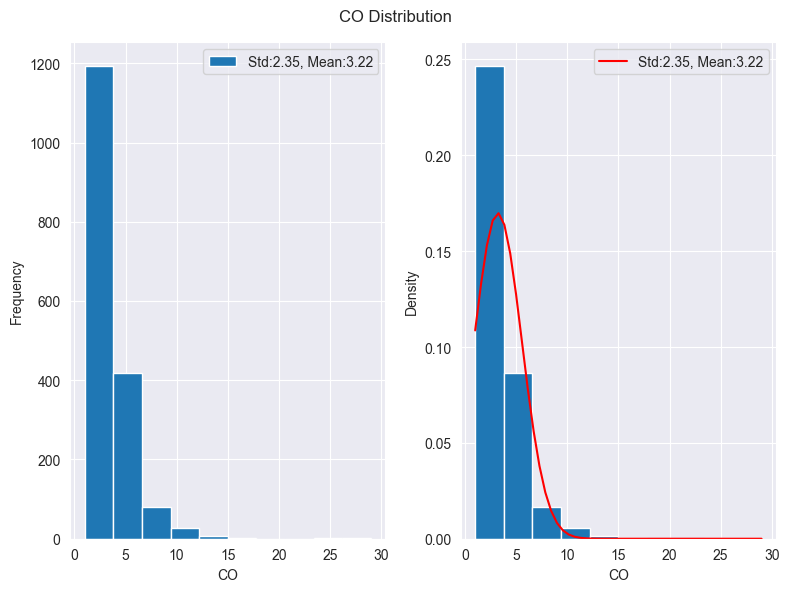

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
std = df["co"].std()
mean = df["co"].mean()
domain = np.linspace(min(df["co"]), max(df["co"]))

axs[0].hist(df["co"], label=f"Std:{std:.2f}, Mean:{mean:.2f}")
axs[0].set_xlabel("CO")
axs[0].set_ylabel("Frequency")

axs[1].hist(df["co"], density=True)
axs[1].set_xlabel("CO")
axs[1].set_ylabel("Density")
axs[1].plot(domain, norm.pdf(domain, mean, std), label=f"Std:{std:.2f}, Mean:{mean:.2f}", color="red")
axs[0].legend()
axs[1].legend()
fig.suptitle("CO Distribution")
plt.tight_layout()
plt.show()

### Observation: 
- The histogram above shows that the CO data is skewed to the right. And the AQI values ​​of CO are mainly concentrated from 0 - 5

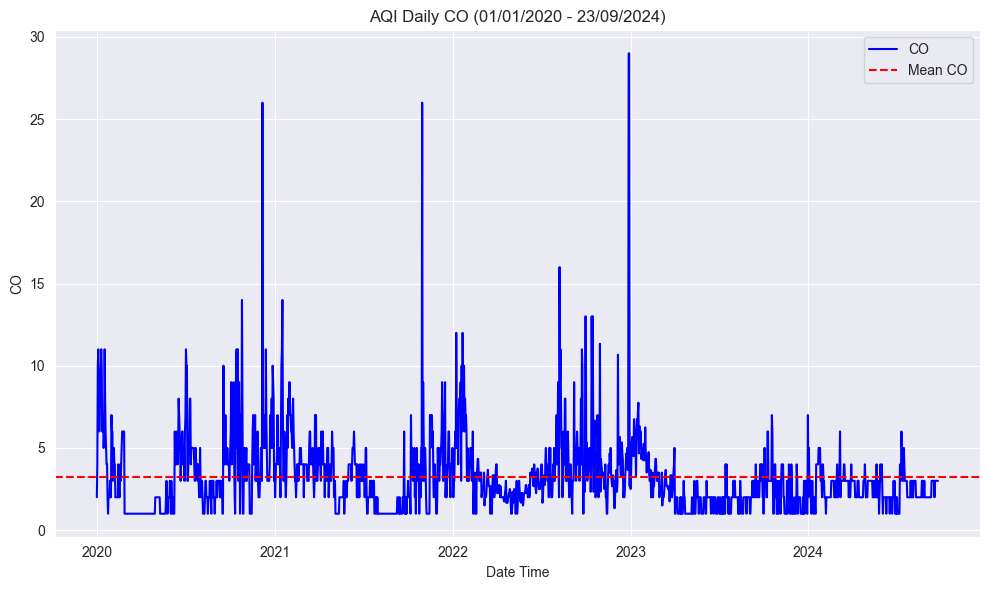

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df["date_time"], df["co"], label="CO", color="b")
plt.xlabel("Date Time")
plt.ylabel("CO")
plt.title("AQI Daily CO (01/01/2020 - 23/09/2024)")
plt.axhline(y=df["co"].mean(), label="Mean CO", linestyle="--", color="red")
plt.legend()
plt.tight_layout()
plt.show()

### Observation: 
- The graph above shows that CO has a difference between before and after 2023. Before 2023, the fluctuations were very large, but after 2023, the data fluctuated less and was more stable.

<Figure size 1500x700 with 0 Axes>

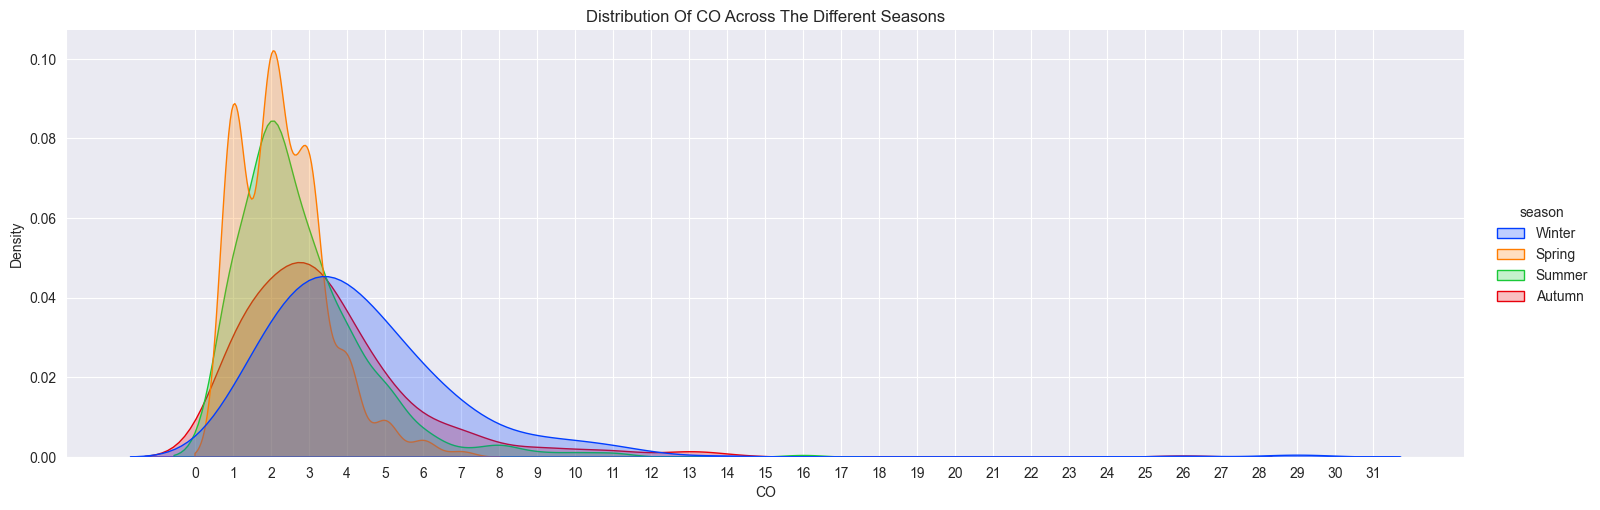

In [8]:
plt.figure(figsize = (15, 7))
x = [i for i in range(0, 32)]
sns.displot(data = df, x = 'co', hue = 'season', kind = 'kde', fill = True, height =5, aspect = 3, palette = sns.color_palette('bright')[:4])
plt.xticks(x)
plt.title('Distribution Of CO Across The Different Seasons')
plt.xlabel("CO")
plt.show()

### Observation: 
- Winter has a wide CO concentration distribution and low peaks, indicating that CO concentrations tend to be higher and more variable during this season. Spring and summer have peaks that are quite close together, with CO concentrations ranging from 1 to 4. This shows that CO concentrations are stable and lower than in winter. Autumn has a similar peak to winter, with most CO values ​​concentrated in the range of 1 to 5, with little spread. This may indicate that CO concentrations in autumn are quite stable.

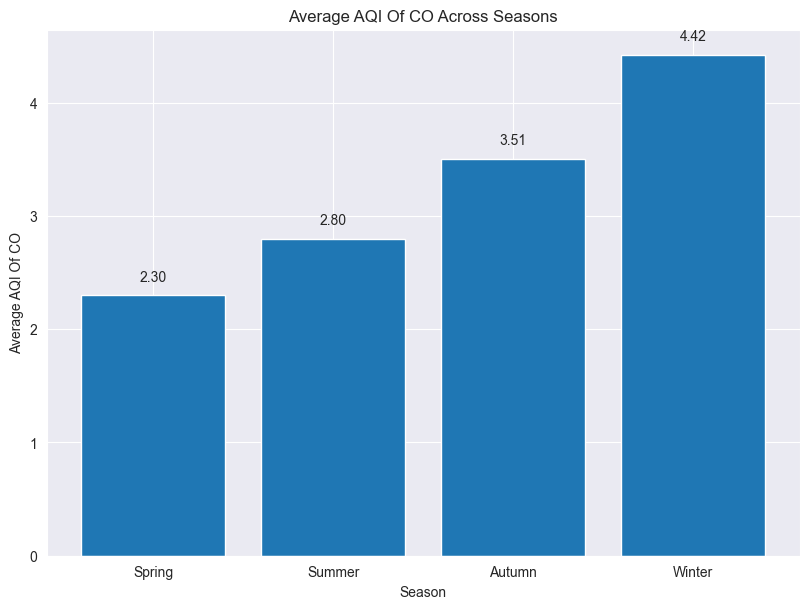

In [9]:
data = []
idx = [i for i in range(0, 4)]
plt.figure(figsize=(8, 6))
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["co"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average AQI Of CO Across Seasons")
plt.tight_layout()
plt.xlabel("Season")
plt.ylabel("Average AQI Of CO")
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.show()

### Observation: 
- The graph above shows that CO increases with each season (spring, summer, fall, winter). Winter is almost twice as high as spring.

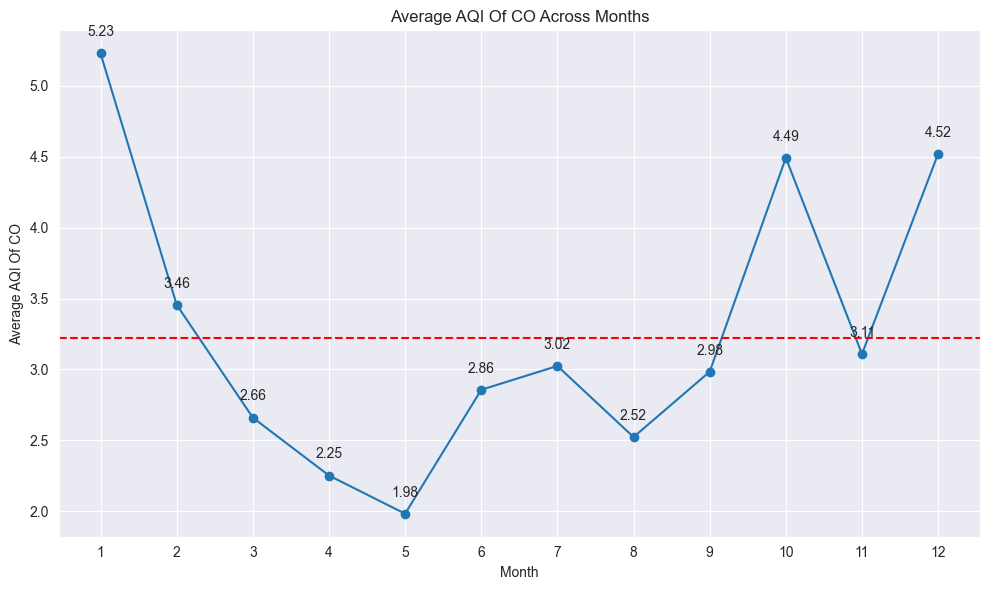

In [10]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["co"].mean())
plt.plot(idx, data, marker="o")
plt.title("Average AQI Of CO Across Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average AQI Of CO")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=df["co"].mean(), color="red", label="Mean", linestyle="--")
plt.tight_layout()
plt.show()

### Observation: 
- The average AQI of CO in the months is quite low, only fluctuating from 1.98 - 5.23. But based on the chart above, we can see a very clear trend that CO decreases from January to May, then increases slightly in June, July, August, and then increases sharply at the end of the year.

# Temperature

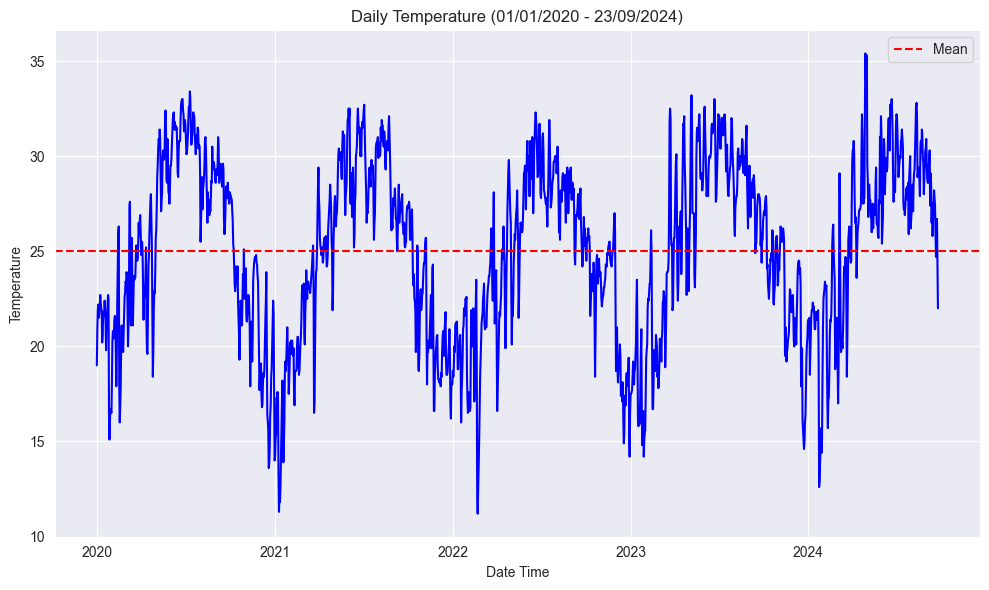

Average Temperature: 25.02870370370371 Degree


In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df["date_time"], df["temp_c"], color="b")
plt.xlabel("Date Time")
plt.ylabel("Temperature")
plt.title("Daily Temperature (01/01/2020 - 23/09/2024)")
temp_mean = df["temp_c"].mean()
plt.axhline(y=temp_mean, color="red", label="Mean", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()
print(f"Average Temperature: {temp_mean} Degree")

### Observation: 
- Temperatures tend to be similar throughout the year.

<Figure size 1500x700 with 0 Axes>

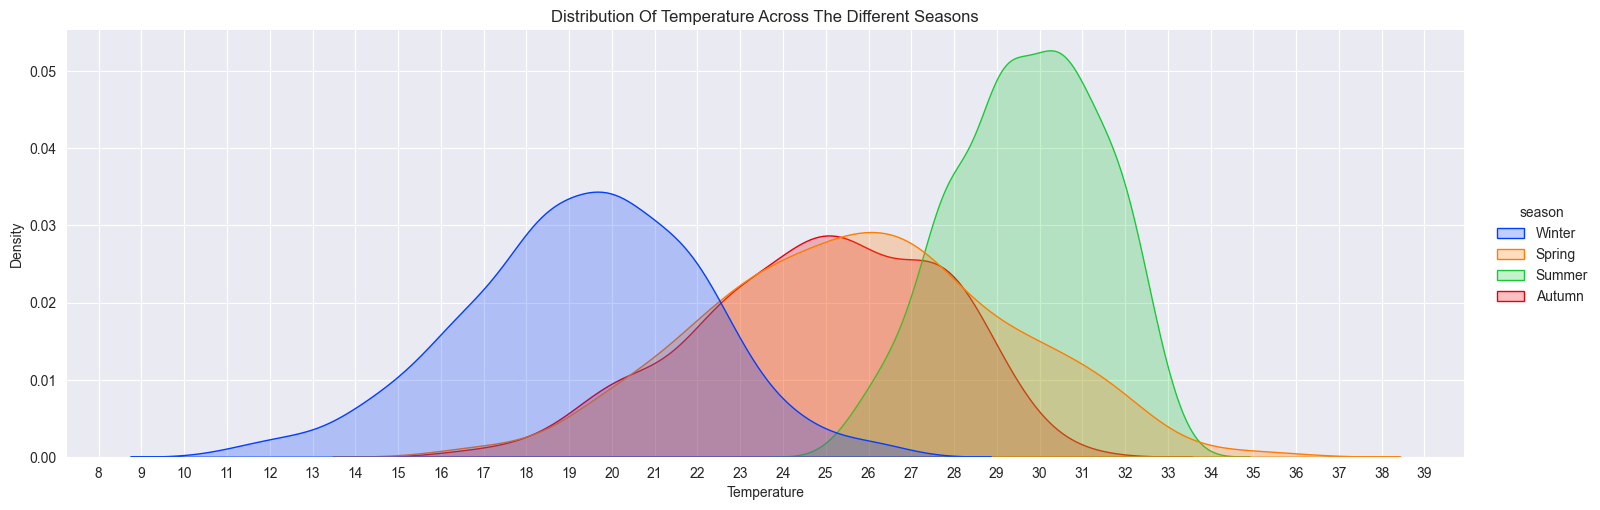

In [12]:
plt.figure(figsize = (15, 7))
x = [i for i in range(8, 40)]
sns.displot(data = df, x = 'temp_c', hue = 'season', kind = 'kde', fill = True, height =5, aspect = 3, palette = sns.color_palette('bright')[:4])
plt.xticks(x)
plt.title('Distribution Of Temperature Across The Different Seasons')
plt.xlabel("Temperature")
plt.show()

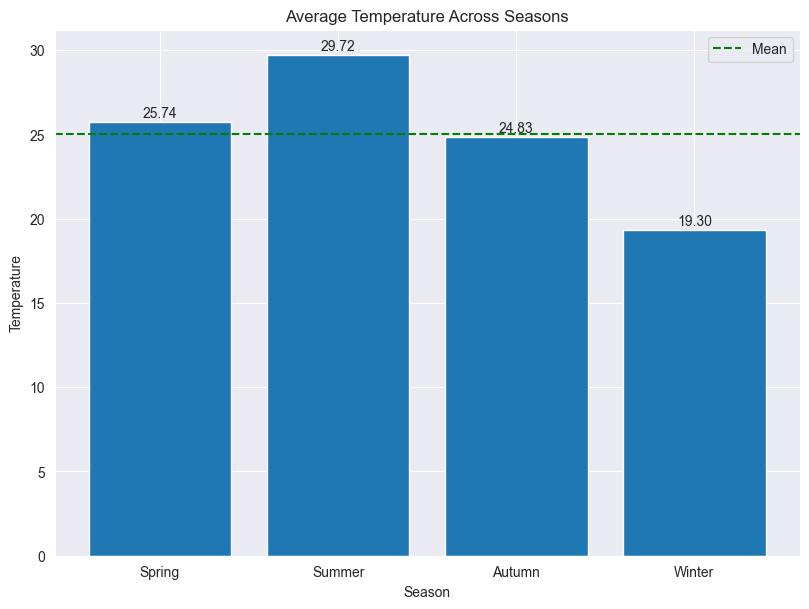

In [13]:
data = []
idx = [i for i in range(0, 4)]
plt.figure(figsize=(8, 6))
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["temp_c"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Temperature Across Seasons")
plt.tight_layout()
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=df["temp_c"].mean(), color="green", label="Mean", linestyle="--")
plt.xlabel("Season")
plt.ylabel("Temperature")
plt.legend()
plt.show()

### Observation: 
- Winter has a very large distribution of low temperatures below 25 degrees. Summer has quite high temperatures from 25 - 34. Spring and autumn are quite cool but the chart above shows that spring temperature fluctuations are quite high. Summer has the highest average temperature and is the hottest season of the year. Winter has the lowest average temperature and is the coldest season.

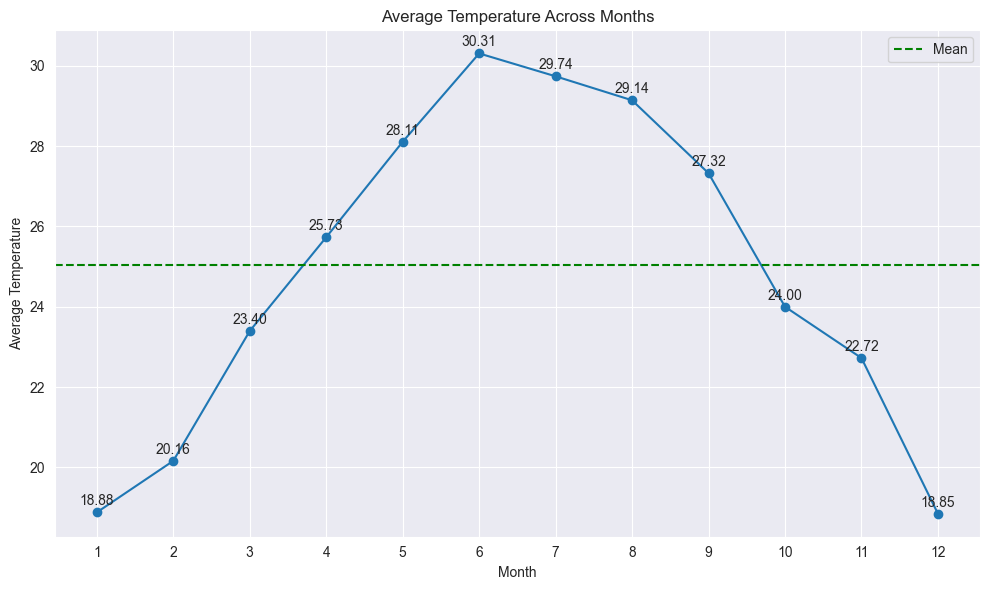

In [14]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["temp_c"].mean())
plt.plot(idx, data, marker="o")
plt.title("Average Temperature Across Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Temperature")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=df["temp_c"].mean(), color="green", label="Mean", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

### Observation: 
- The graph above clearly shows that the temperature increases gradually from January to June, reaching its peak and decreasing towards the end of the year. June has the highest average temperature of 30.31 degrees and the first 3 months and the last 3 months of the year have temperatures lower than the average temperature. The lowest are January and December.

# Wind Speed

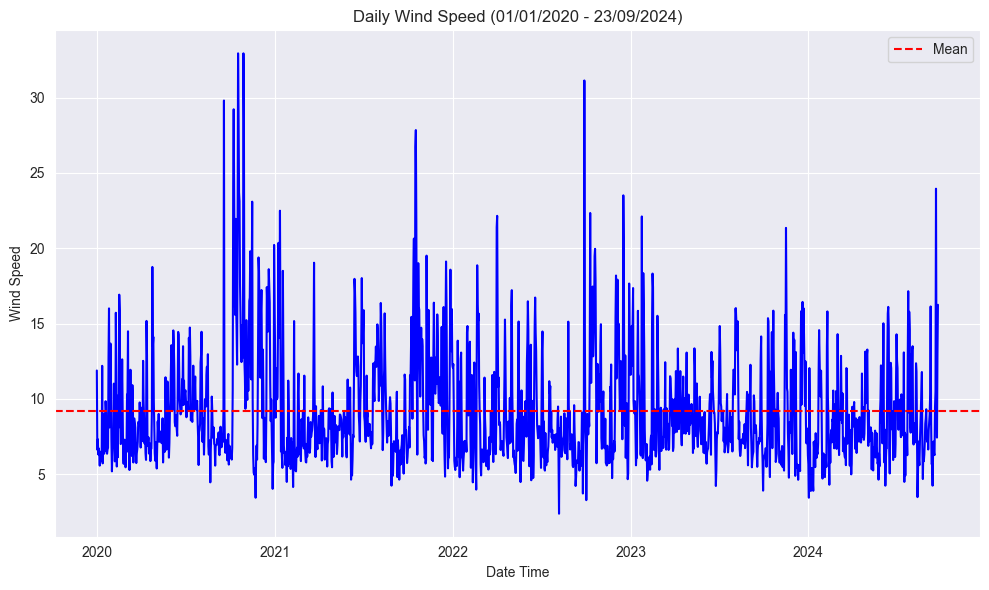

Average Wind Speed: 9.223541666666666 KPH


In [15]:
plt.figure(figsize=(10, 6))
plt.plot(df["date_time"], df["wind_kph"], color="b")
plt.xlabel("Date Time")
plt.ylabel("Wind Speed")
plt.title("Daily Wind Speed (01/01/2020 - 23/09/2024)")
wind_mean = df["wind_kph"].mean()
plt.axhline(y=wind_mean, color="red", label="Mean", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()
print(f"Average Wind Speed: {wind_mean} KPH")

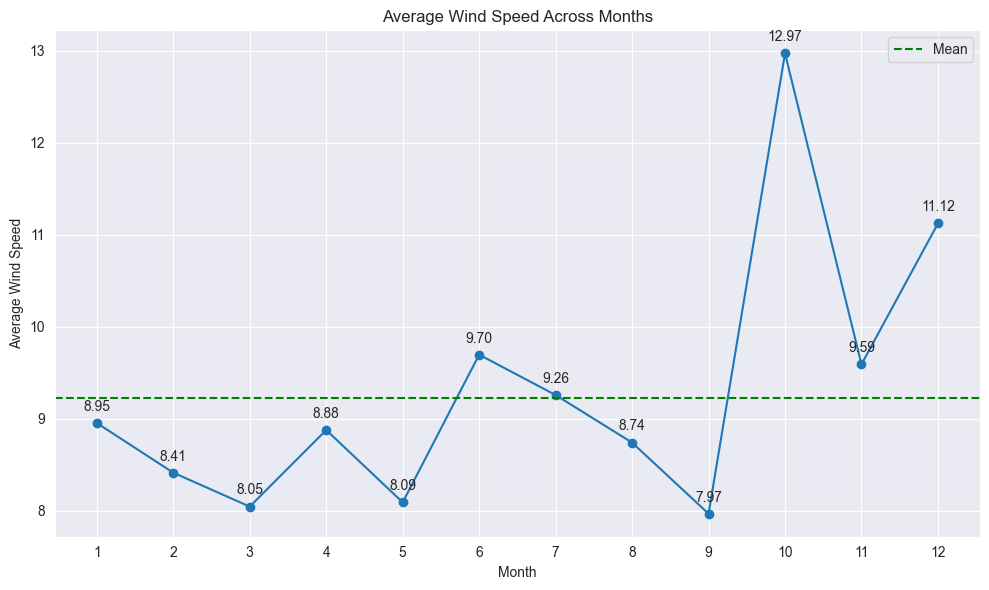

In [16]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["wind_kph"].mean())
plt.plot(idx, data, marker="o")
plt.title("Average Wind Speed Across Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Wind Speed")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=wind_mean, color="green", label="Mean", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

### Observation: 
- The two graphs above show that from January to September, the wind speed is quite stable, the difference is not too large and is below the average. From September to October, the wind speed increases significantly and October is the month with the highest wind speed. June, July, October, November, December are the months with wind speed above the average.

<Figure size 1500x700 with 0 Axes>

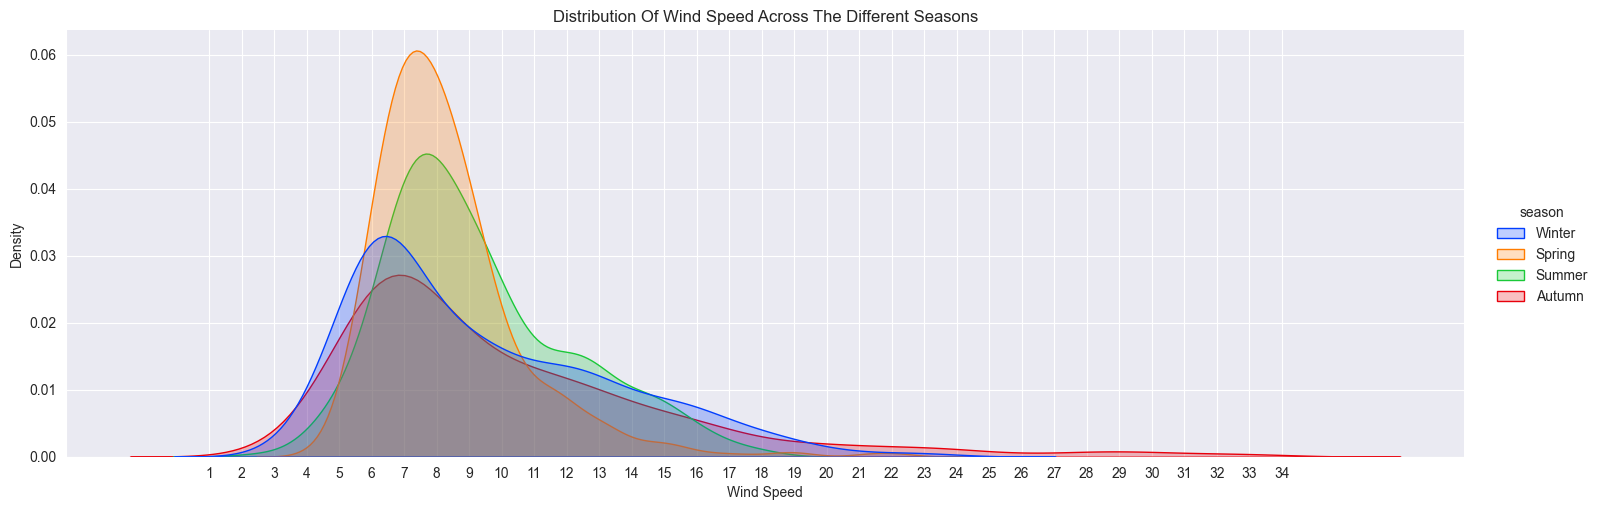

In [17]:
plt.figure(figsize = (15, 7))
x = [i for i in range(1, 35)]
sns.displot(data = df, x = 'wind_kph', hue = 'season', kind = 'kde', fill = True, height =5, aspect = 3, palette = sns.color_palette('bright')[:4])
plt.xticks(x)
plt.title('Distribution Of Wind Speed Across The Different Seasons')
plt.xlabel("Wind Speed")
plt.show()

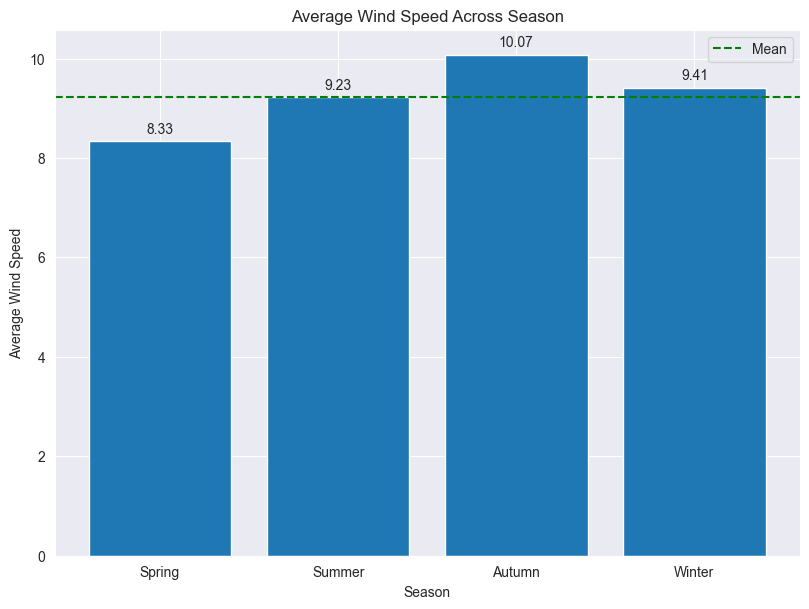

In [18]:
data = []
idx = [i for i in range(0, 4)]
plt.figure(figsize=(8, 6))
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["wind_kph"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Wind Speed Across Season")
plt.tight_layout()
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=wind_mean, color="green", label="Mean", linestyle="--")
plt.xlabel("Season")
plt.ylabel("Average Wind Speed")
plt.legend()
plt.show()

### Observation: 
- The two graphs above show that Autumn and Summer these seasons typically have less variability in low wind speeds. Spring and Winter these seasons exhibit a wider range of wind speeds, with winter exhibiting the widest spread, including both low and high wind speeds. Therefore, spring and winter exhibit greater variability, possibly due to more dynamic weather conditions during these seasons.

# Humidity

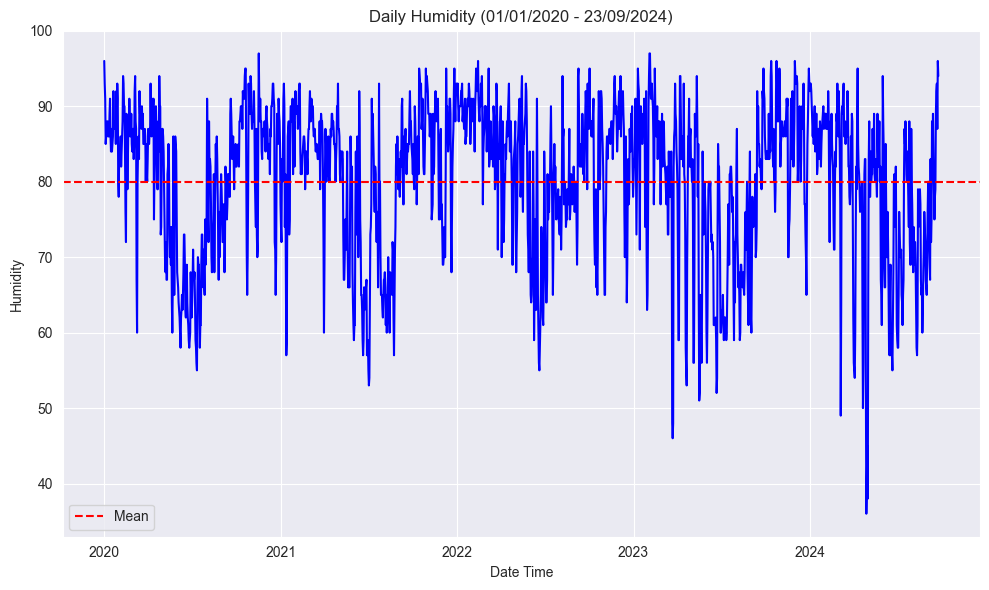

Average Humidity: 80.00983796296296


In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df["date_time"], df["humidity"], color="b")
plt.xlabel("Date Time")
plt.ylabel("Humidity")
plt.title("Daily Humidity (01/01/2020 - 23/09/2024)")
humidity_mean = df["humidity"].mean()
plt.axhline(y=humidity_mean, color="red", label="Mean", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()
print(f"Average Humidity: {humidity_mean}")

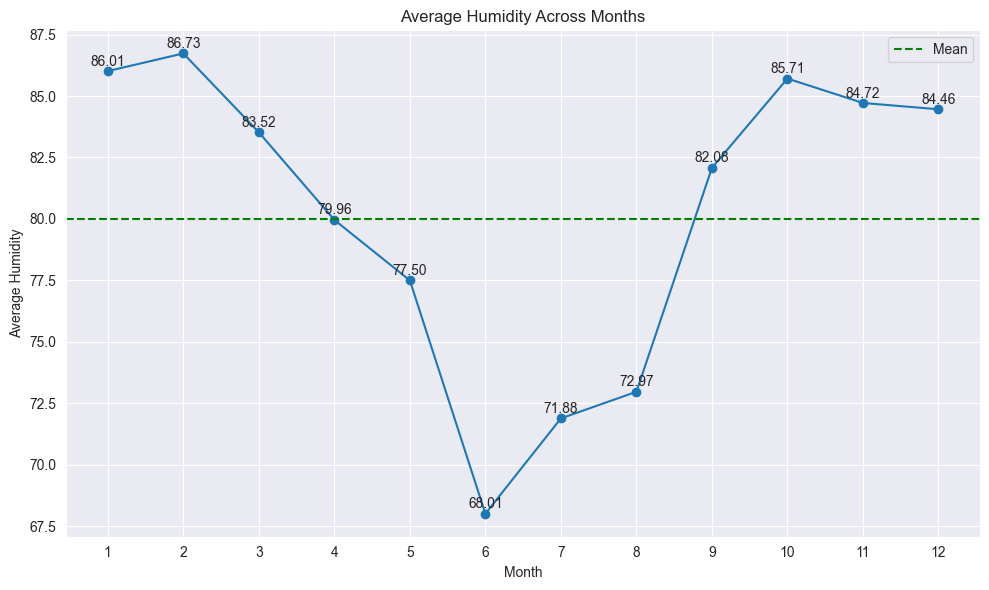

In [20]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = []
for month in months:
    val = group_month.get_group((month,))
    data.append(val["humidity"].mean())
plt.plot(idx, data, marker="o")
plt.title("Average Humidity Across Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Average Humidity")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=humidity_mean, color="green", label="Mean", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

### Observation: 
- The two graphs above show that humidity is high in the first and last months of the year (January, February, March, September, October, November, December). Humidity drops sharply until June and then increases again. Showing that autumn and winter have the highest humidity of the year.

<Figure size 1500x700 with 0 Axes>

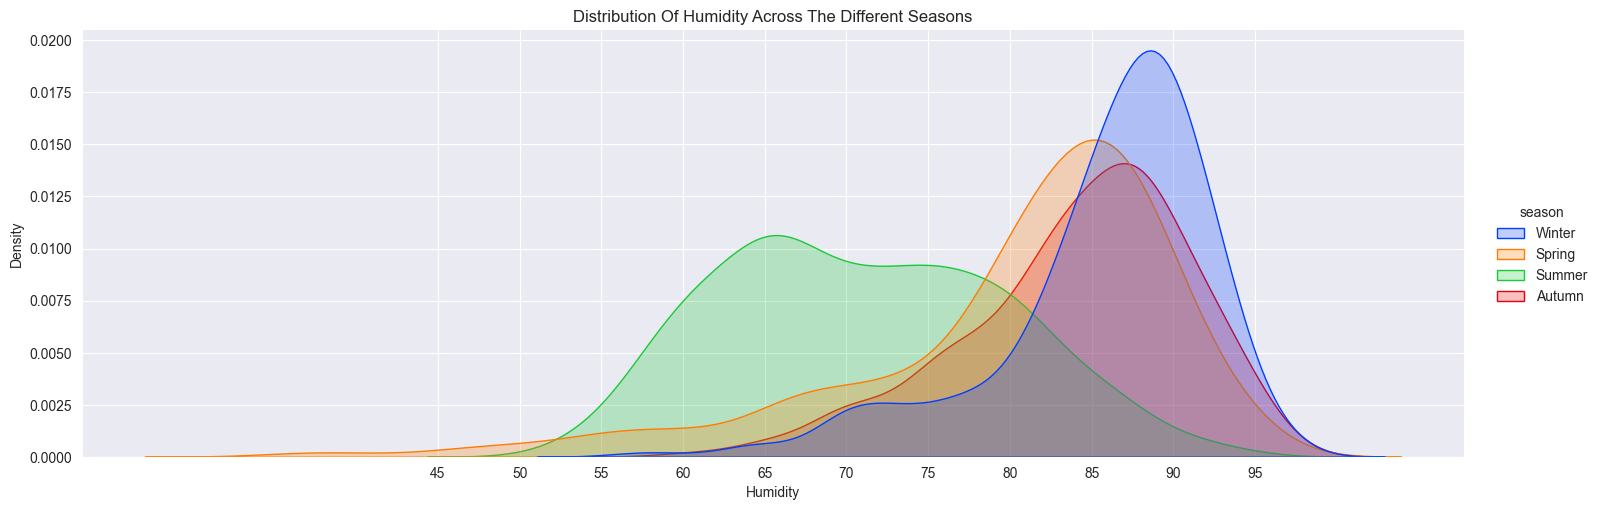

In [21]:
plt.figure(figsize = (15, 7))
x = [i for i in range(45, 100, 5)]
sns.displot(data = df, x = 'humidity', hue = 'season', kind = 'kde', fill = True, height =5, aspect = 3, palette = sns.color_palette('bright')[:4])
plt.xticks(x)
plt.title('Distribution Of Humidity Across The Different Seasons')
plt.xlabel("Humidity")
plt.show()

### Observation:
- Winter (blue): Humidity is most concentrated, ranging mainly from 80% to 95%, indicating that winter has very high humidity compared to other seasons.
- Spring (yellow): Humidity distribution is wider and not as concentrated as winter, ranging from about 55% to 90%. This indicates that spring has high humidity but is not as extreme as winter.
- Summer (green): Summer distribution tends to be more concentrated at lower levels, mainly from 50% to 75%. This is the season with the lowest average humidity of the four seasons, which may be related to hotter and drier weather conditions.
- Autumn (red): Autumn humidity distribution is in between summer and winter, mainly from 70% to 85%, indicating that humidity in autumn is quite high but not as extreme as winter.

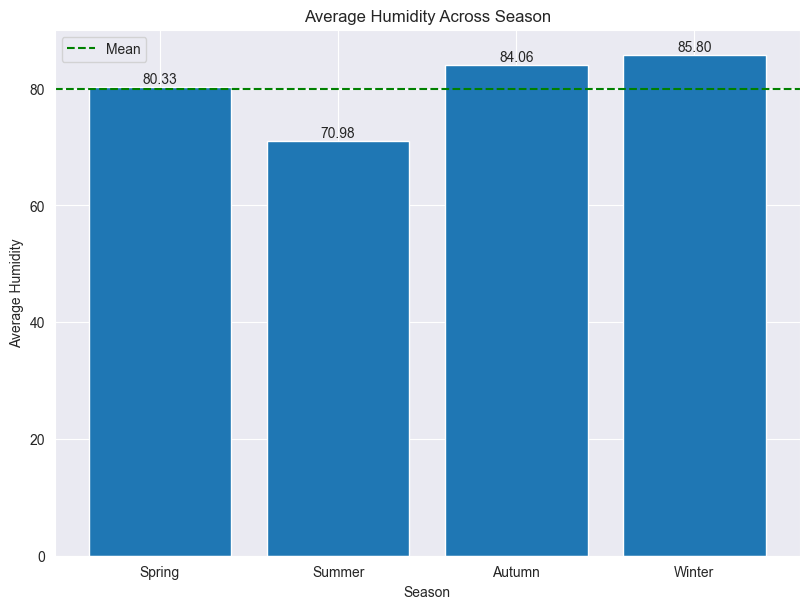

In [22]:
data = []
idx = [i for i in range(0, 4)]
plt.figure(figsize=(8, 6))
for i, season in enumerate(seasons):
    val = group_season.get_group((season,))
    data.append(val["humidity"].mean())
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Humidity Across Season")
plt.tight_layout()
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.axhline(y=df["humidity"].mean(), color="green", label="Mean", linestyle="--")
plt.xlabel("Season")
plt.ylabel("Average Humidity")
plt.legend()
plt.show()

### Observation:
- There is a large difference between summer and winter humidity.

# Precipitation

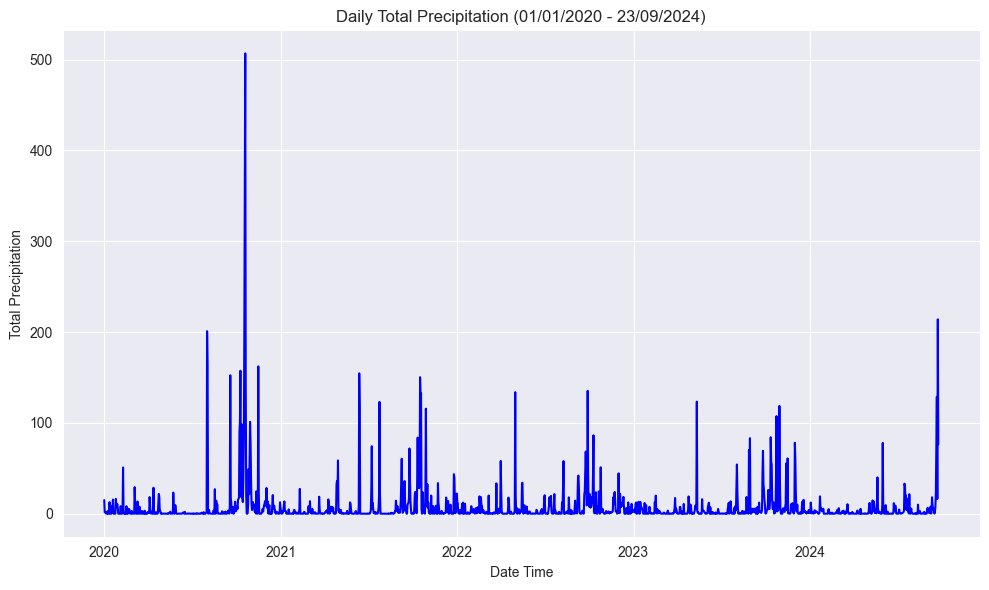

Annual Precipitation: 2886.50


In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df["date_time"], df["totalprecip_mm"], color="b")
plt.xlabel("Date Time")
plt.ylabel("Total Precipitation")
plt.title("Daily Total Precipitation (01/01/2020 - 23/09/2024)")
plt.tight_layout()
plt.show()
annual_precipitation = 0
for year in years:
    if year == 2024:
        continue
    data = group_year.get_group((year,))
    annual_precipitation += data["totalprecip_mm"].sum()
annual_precipitation /= 4
print(f"Annual Precipitation: {annual_precipitation:.2f}")

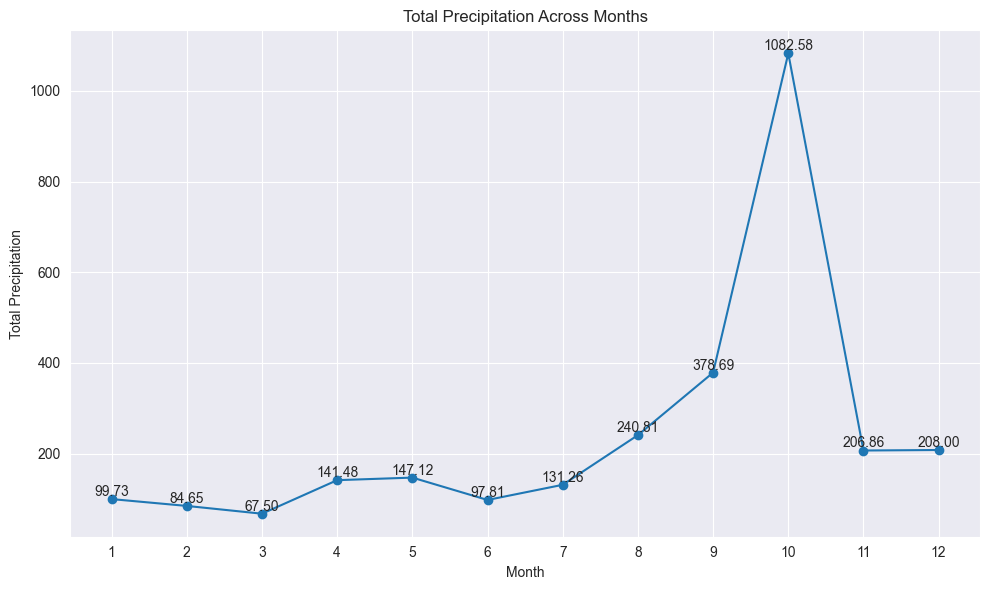

In [24]:
plt.figure(figsize=(10, 6))
idx = [i for i in range(1, 13)]
data = [0 for i in range(0, 12)]

for i, year in enumerate(years):
    if year == 2024:
        continue
    for j, month in enumerate(months):
        val = group_year_month.get_group((year, month))
        data[j] += val["totalprecip_mm"].sum()
data = [i / 4 for i in data]
plt.plot(idx, data, marker="o")
plt.title("Total Precipitation Across Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Total Precipitation")
for i, value in enumerate(data):
    plt.text(i + 1, value + 0.2, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

### Observation:
- Based on the two graphs above, it shows that rainfall is mainly concentrated in the last months of the year. In particular, in October, the average total rainfall is 1082.58 and in August, September, November, December, it is 2 - 3 times higher than in the spring and summer months. The rainfall from January to July is not significantly different.

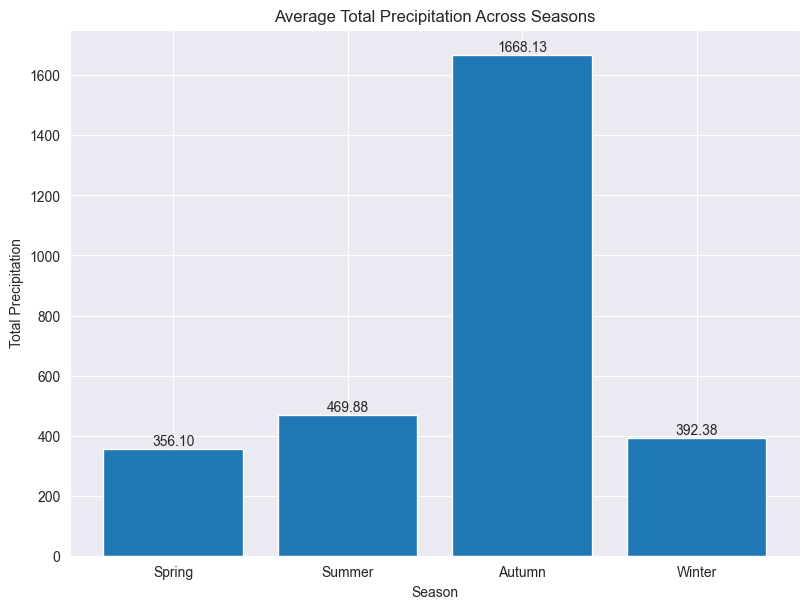

In [25]:
data = [0, 0, 0, 0]
idx = [i for i in range(0, 4)]
plt.figure(figsize=(8, 6))
for i, year in enumerate(years):
    if year == 2024:
        continue
    for j, season in enumerate(seasons):
        val = group_year_season.get_group((year, season))
        data[j] += val["totalprecip_mm"].sum()
data = [item / 4 for item in data]
plt.bar(idx, data)
plt.xticks(idx, seasons)
plt.title("Average Total Precipitation Across Seasons")
plt.tight_layout()
for i, value in enumerate(data):
    plt.text(i, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.xlabel("Season")
plt.ylabel("Total Precipitation")
plt.show()

### Observation:
- There is a large difference in total rainfall between Autumn and other seasons.

# Does Temperature Affect CO ?

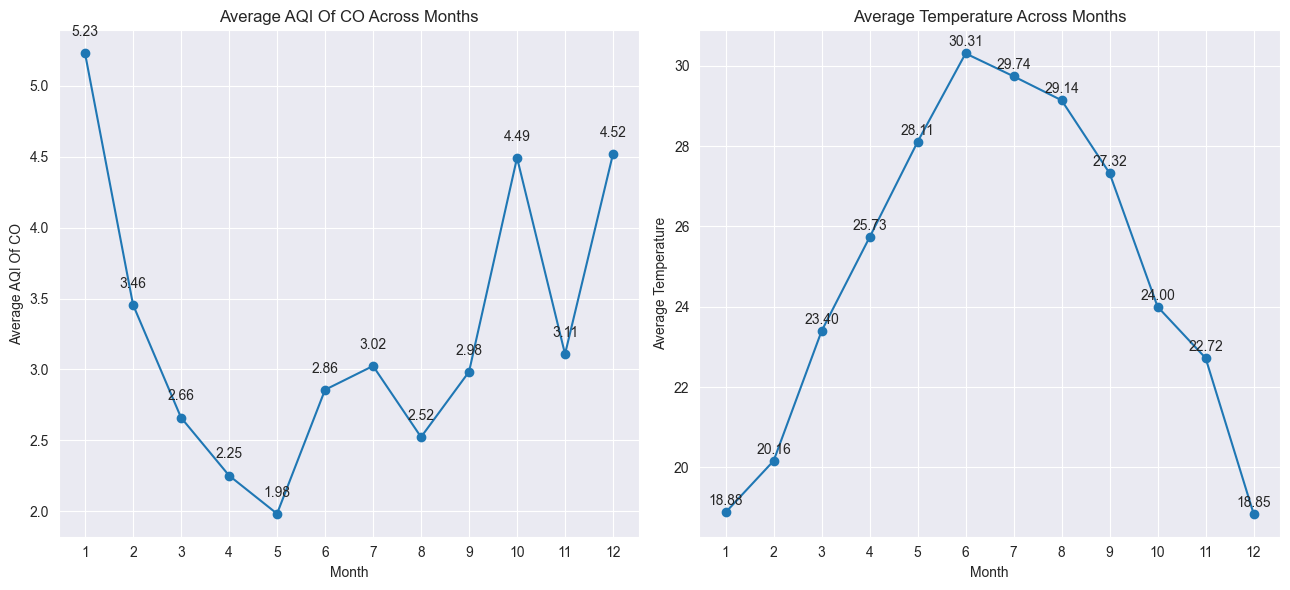

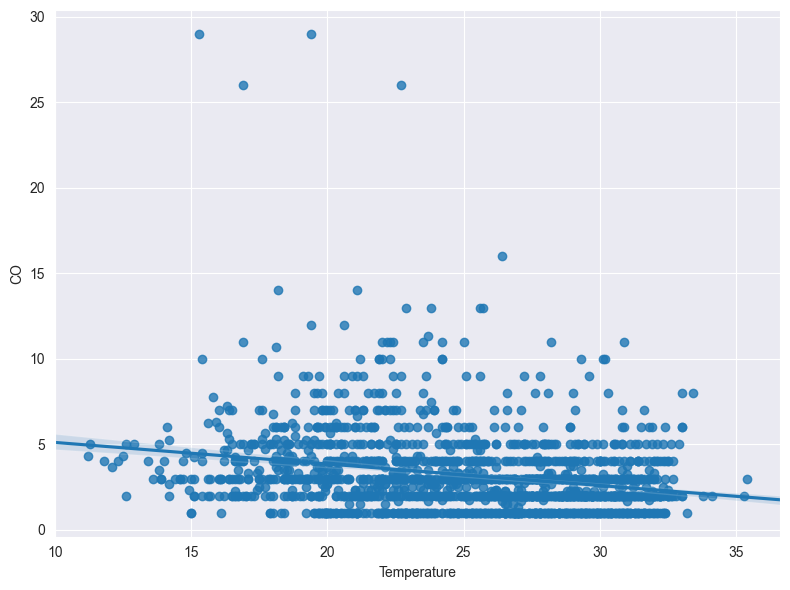

Correlation Between CO And Temperature: -0.25


In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

idx = [i for i in range(1, 13)]
data1 = []
for month in months:
    val = group_month.get_group((month,))
    data1.append(val["co"].mean())
axs[0].plot(idx, data1, marker="o")
axs[0].set_title("Average AQI Of CO Across Months")
axs[0].set_xticks(months)
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Average AQI Of CO")
for i, value in enumerate(data1):
    axs[0].text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

data2 = []
for month in months:
    val = group_month.get_group((month,))
    data2.append(val["temp_c"].mean())
axs[1].plot(idx, data2, marker="o")
axs[1].set_title("Average Temperature Across Months")
axs[1].set_xticks(months)
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Average Temperature")
for i, value in enumerate(data2):
    axs[1].text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.regplot(data=df, x="temp_c", y="co", ax=axs, truncate=False)
axs.set_xlabel("Temperature")
axs.set_ylabel("CO")
plt.tight_layout()
plt.show()

corr = df["co"].corr(df["temp_c"])
print(f"Correlation Between CO And Temperature: {corr:.2f}")

### Observation:
- The correlation between temperature and CO is quite low, showing that there is no linear relationship. But the above charts show that there is an influence between temperature and CO. In seasons and months with low temperatures, CO is high and vice versa.

# Does Precipitation Affect CO ?

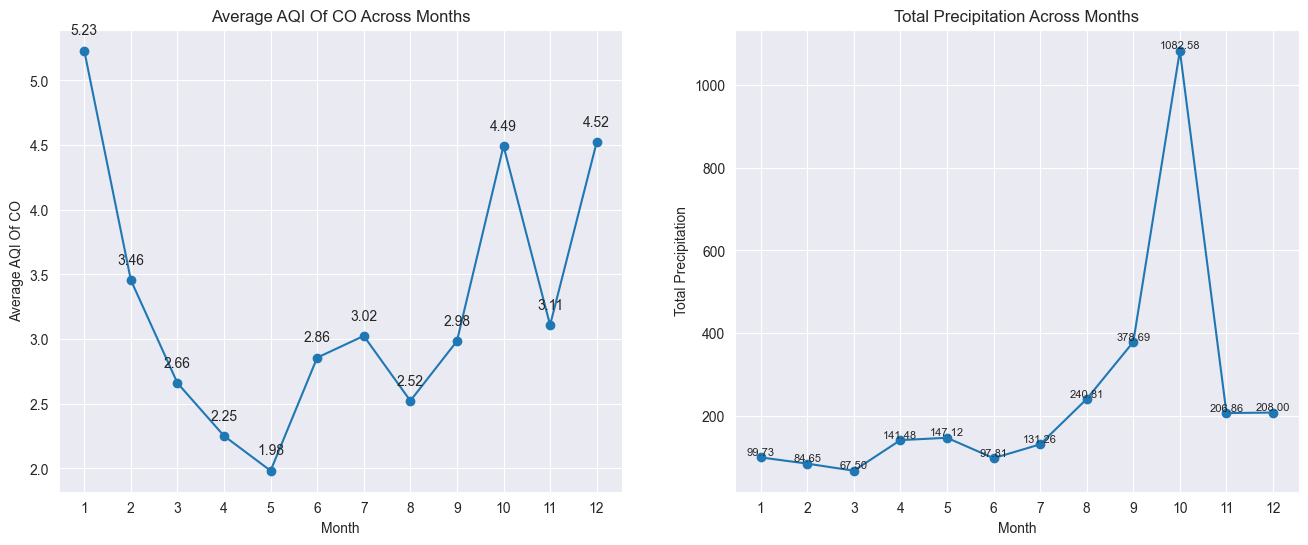

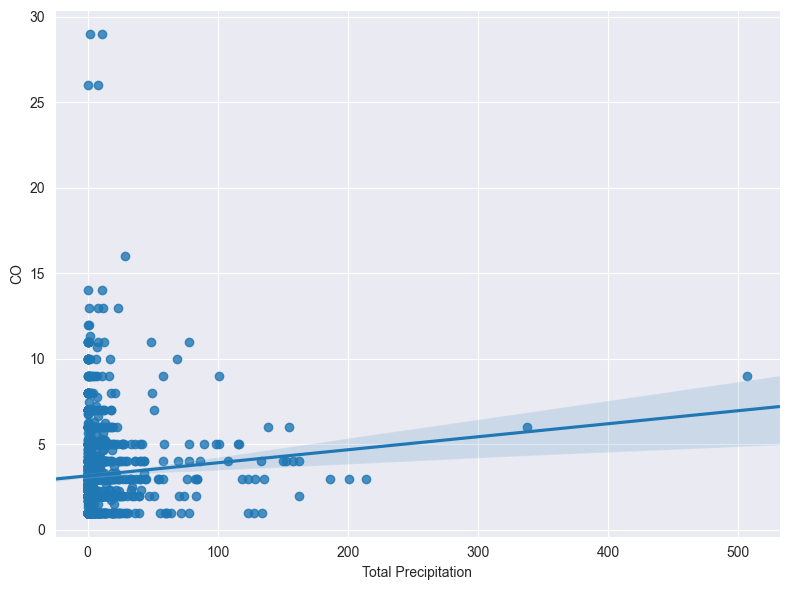

Correlation Between CO And Total Precipitation: 0.08


In [27]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

idx = [i for i in range(1, 13)]
data1 = []
for month in months:
    val = group_month.get_group((month,))
    data1.append(val["co"].mean())
axs[0].plot(idx, data1, marker="o")
axs[0].set_title("Average AQI Of CO Across Months")
axs[0].set_xticks(months)
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Average AQI Of CO")
for i, value in enumerate(data1):
    axs[0].text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

data2 = [0 for i in range(0, 12)]
for i, year in enumerate(years):
    if year == 2024:
        continue
    for j, month in enumerate(months):
        val = group_year_month.get_group((year, month))
        data2[j] += val["totalprecip_mm"].sum()
data2 = [i / 4 for i in data2]
plt.plot(idx, data2, marker="o")
plt.title("Total Precipitation Across Months")
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Total Precipitation")
for i, value in enumerate(data2):
    plt.text(i + 1, value + 0.2, f"{value:.2f}", ha="center", va="bottom", size=8)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.regplot(data=df, x="totalprecip_mm", y="co", ax=axs, truncate=False)
axs.set_xlabel("Total Precipitation")
axs.set_ylabel("CO")
plt.tight_layout()
plt.show()

corr = df["co"].corr(df["totalprecip_mm"])
print(f"Correlation Between CO And Total Precipitation: {corr:.2f}")

### Observation:
- The correlation between CO and rainfall is almost zero. But looking at the chart above, we can see that from the first months of the year when there is little rainfall, CO is quite high and when there is heavy rain, CO decreases.

# Does Humidity Affect CO ?

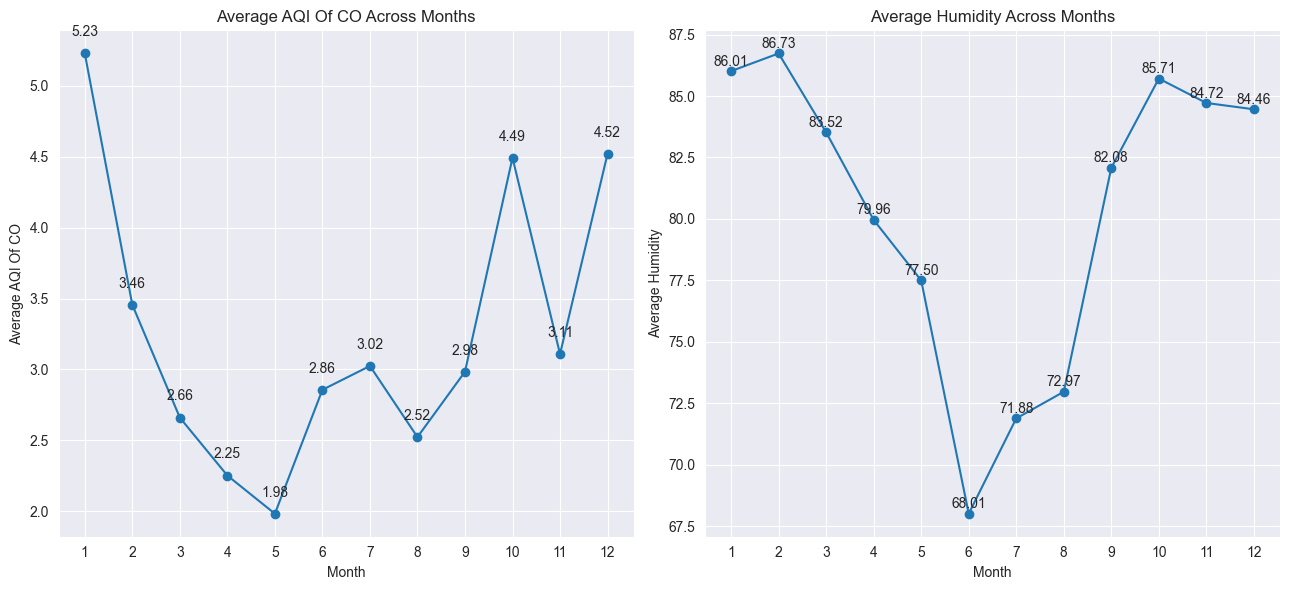

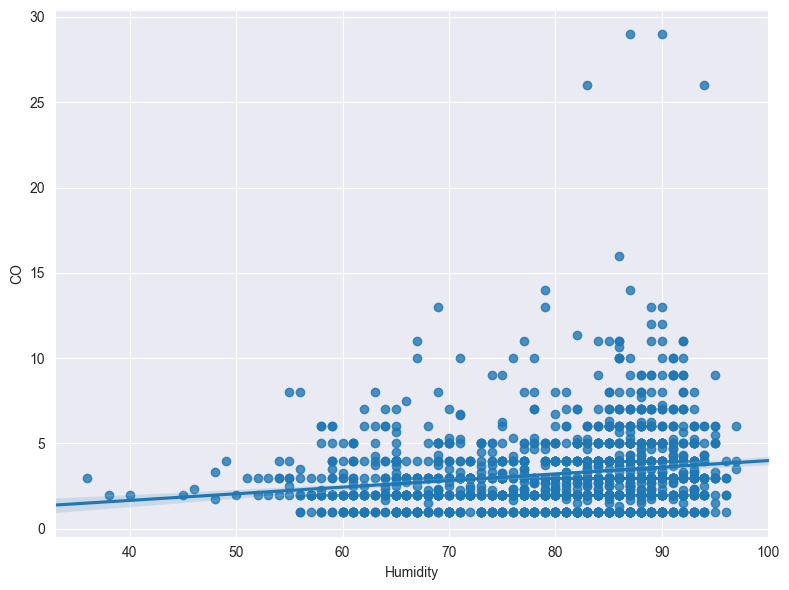

Correlation Between CO And Humidity: 0.17


In [28]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

idx = [i for i in range(1, 13)]
data1 = []
for month in months:
    val = group_month.get_group((month,))
    data1.append(val["co"].mean())
axs[0].plot(idx, data1, marker="o")
axs[0].set_title("Average AQI Of CO Across Months")
axs[0].set_xticks(months)
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Average AQI Of CO")
for i, value in enumerate(data1):
    axs[0].text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

data2 = []
for month in months:
    val = group_month.get_group((month,))
    data2.append(val["humidity"].mean())
axs[1].plot(idx, data2, marker="o")
axs[1].set_title("Average Humidity Across Months")
axs[1].set_xticks(months)
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Average Humidity")
for i, value in enumerate(data2):
    axs[1].text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.regplot(data=df, x="humidity", y="co", ax=axs, truncate=False)
axs.set_xlabel("Humidity")
axs.set_ylabel("CO")
plt.tight_layout()
plt.show()

corr = df["co"].corr(df["humidity"])
print(f"Correlation Between CO And Humidity: {corr:.2f}")

### Observation:
- The correlation between CO and humidity is very small, showing that they do not have a linear relationship. But through the chart above, we see that CO and humidity have the same increasing and decreasing trend. In the early and late months of the year when humidity is high, CO is very high, but in the summer months, when humidity drops, CO drops sharply.

# Does Wind Speed Affect CO ?

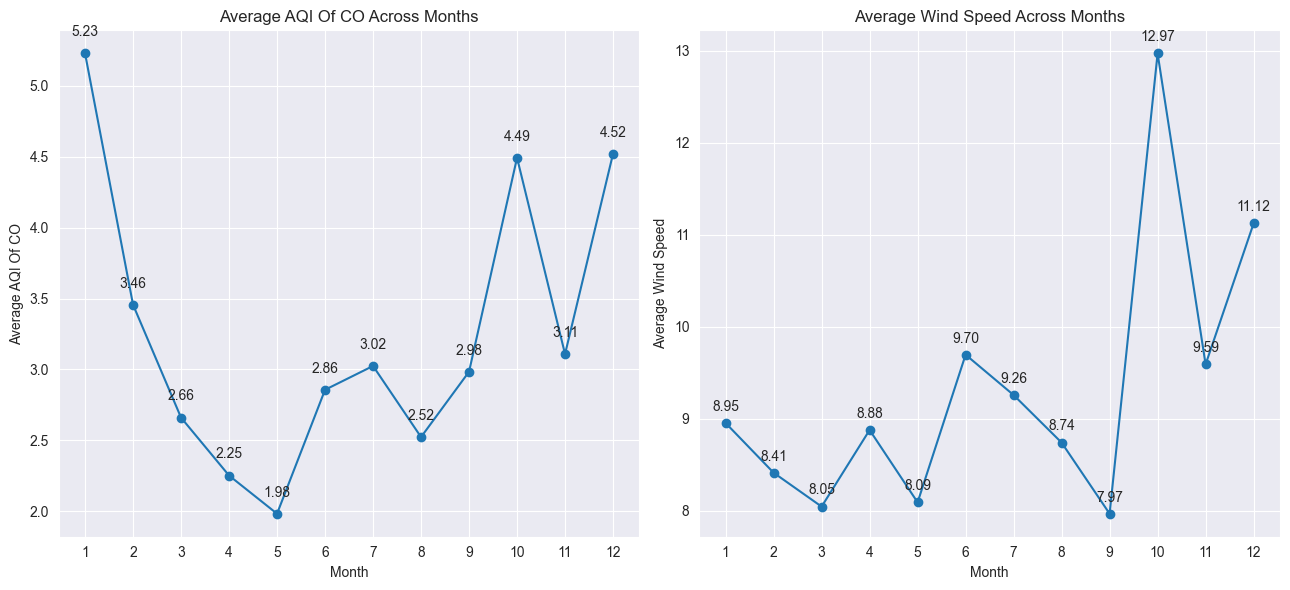

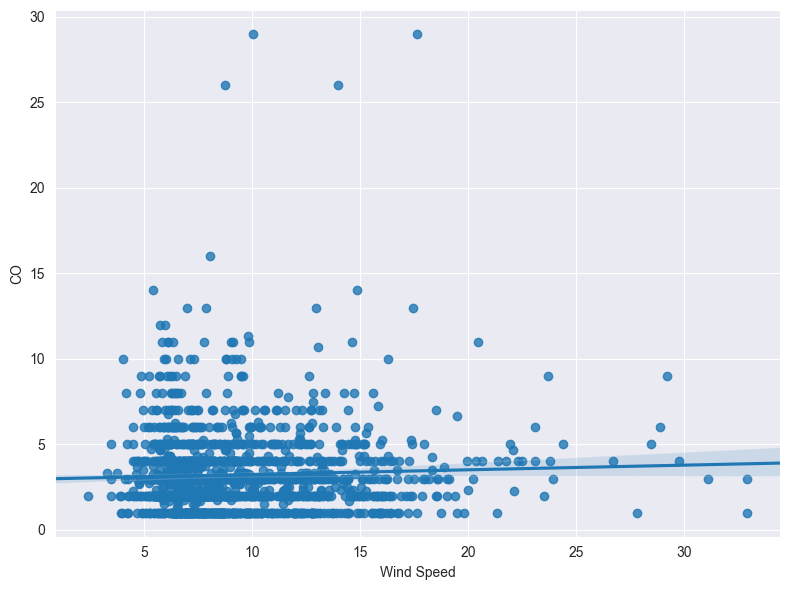

Correlation Between CO And Wind Speed: 0.04


In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

idx = [i for i in range(1, 13)]
data1 = []
for month in months:
    val = group_month.get_group((month,))
    data1.append(val["co"].mean())
axs[0].plot(idx, data1, marker="o")
axs[0].set_title("Average AQI Of CO Across Months")
axs[0].set_xticks(months)
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Average AQI Of CO")
for i, value in enumerate(data1):
    axs[0].text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")

data2 = []
for month in months:
    val = group_month.get_group((month,))
    data2.append(val["wind_kph"].mean())
axs[1].plot(idx, data2, marker="o")
axs[1].set_title("Average Wind Speed Across Months")
axs[1].set_xticks(months)
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Average Wind Speed")
for i, value in enumerate(data2):
    axs[1].text(i + 1, value + 0.1, f"{value:.2f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
sns.regplot(data=df, x="wind_kph", y="co", ax=axs, truncate=False)
axs.set_xlabel("Wind Speed")
axs.set_ylabel("CO")
plt.tight_layout()
plt.show()

corr = df["co"].corr(df["wind_kph"])
print(f"Correlation Between CO And Wind Speed: {corr:.2f}")

### Observation:
- The correlation between CO and wind speed is almost zero. Based on the graph, it can be seen that wind speed can reduce CO when the wind is strong, and vice versa.

# CONCLUSION:
### Weather:
- Temperatures are quite similar throughout the year. Spring and autumn are quite cool, only about 25 degrees. Summer is quite hot, the average temperature can reach 30.31 degrees in June. Winter is the coldest season with the lowest average temperature in December and January, only 18 degrees.
- Wind speed is quite stable from January to September. But from October, wind speed increases quite strongly and at the end of the year wind speed is unstable but fluctuates quite a lot.
- Humidity varies quite a lot between seasons. Humidity is very low in summer, especially the lowest in June, only about 68%. Humidity is high in autumn and winter, more than 84%. The difference in humidity between summer and winter is quite large.
- The average total rainfall for the whole year is very high, 2886.5mm. Rainfall is mainly concentrated in the last months of the year, highest in October, accounting for more than 50% of the total annual rainfall.
### The Impact Of Weather On CO:
- The correlation between temperature and CO is quite low, showing that there is no linear relationship. But the above charts show that there is an influence between temperature and CO. In seasons and months with low temperatures, CO is high and vice versa.
- The correlation between CO and rainfall is almost zero. But looking at the chart above, we can see that from the first months of the year when there is little rainfall, CO is quite high and when there is heavy rain, CO decreases.
- The correlation between CO and humidity is very small, showing that they do not have a linear relationship. But through the chart above, we see that CO and humidity have the same increasing and decreasing trend. In the early and late months of the year when humidity is high, CO is very high, but in the summer months, when humidity drops, CO drops sharply.
- The correlation between CO and wind speed is almost zero. Based on the graph, it can be seen that wind speed can reduce CO when the wind is strong, and vice versa.

=> Thus, although there is no clear linear relationship, temperature, humidity, precipitation, and wind speed appear to influence the accumulation and dispersion of CO in the atmosphere.

